In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_full = pd.read_csv('mShop PI 3 Health Check (Responses) - Form responses 1 (Final).csv')


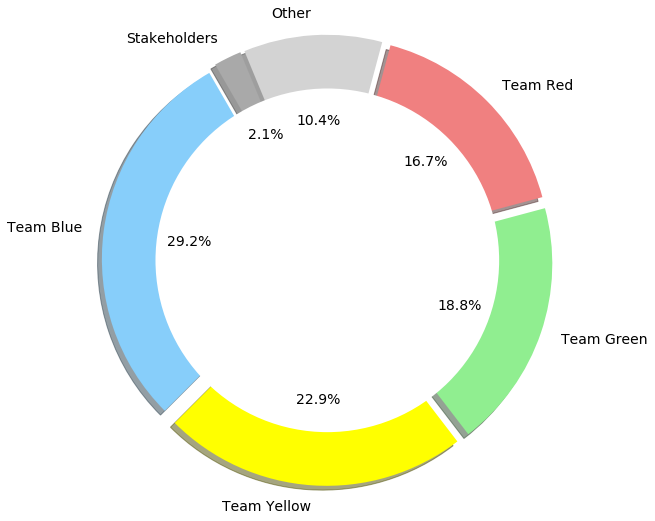

In [15]:
df = df_full.drop(['Timestamp','One most important thing you want to improve as soon as possible'], axis=1)

teams = df['Select your team'].value_counts()
plt.figure(figsize=(9,9))

colors = {'Team Blue':'lightskyblue', 'Team Yellow':'yellow',  'Team Green':'lightgreen', 'Team Red':'lightcoral','Stakeholders':'darkgrey', 'Other':'lightgrey'}

colors_inv = [colors[x] for x in teams.index]

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(teams, autopct='%1.1f%%',labels=teams.index, colors=colors_inv,explode=explode, shadow=True, startangle=120,textprops={'fontsize': 14})
plt.axis('equal')

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plt.tight_layout()
plt.ylabel("")
plt.savefig('PI3/piechart.png', bbox_inches='tight')


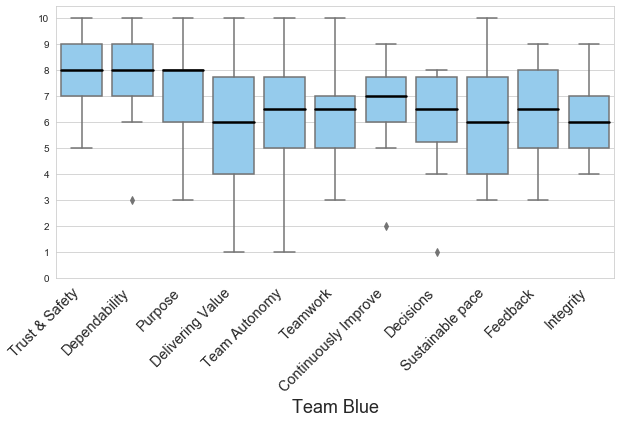

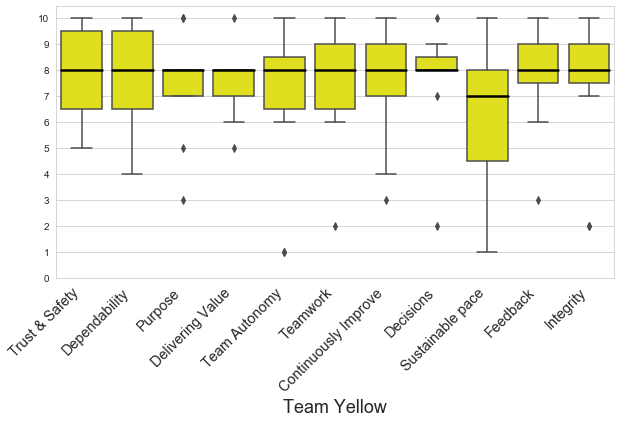

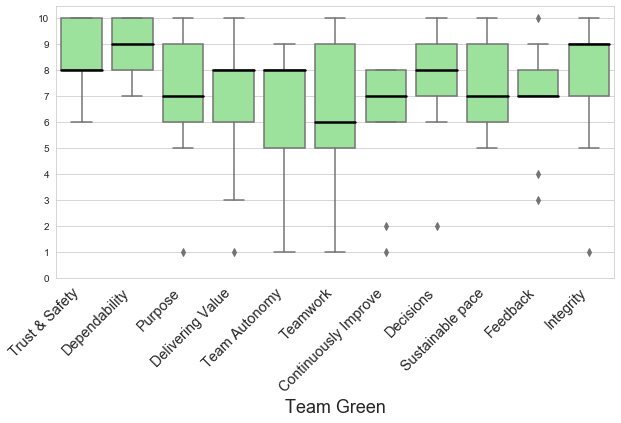

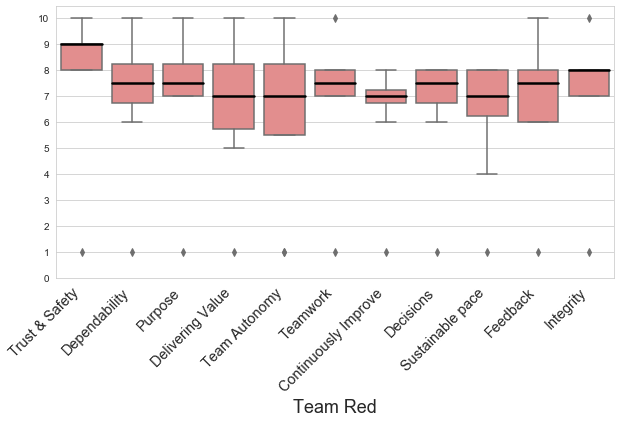

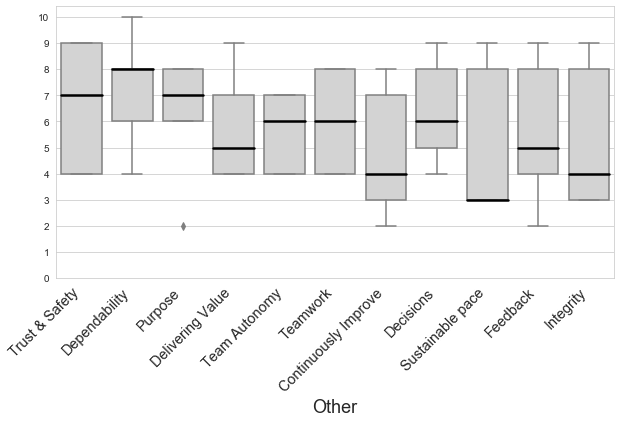

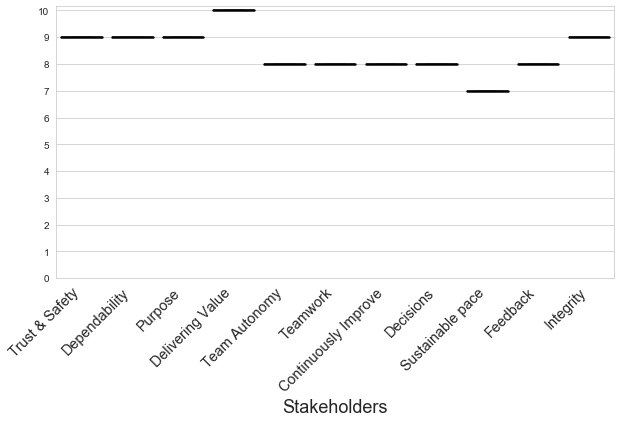

In [9]:

for team in teams.index: 
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    color = colors[team]
    data = df.loc[df['Select your team'] == team]
    chart = sns.boxplot(data=data, color=color,medianprops={'color':'black','linewidth':'2.5'})
#         sns.set_style("ticks", {"ytick.major.size":10})
    chart.set_yticks(np.arange(0, 11, step=1))
    chart.set_xlabel(team, fontsize=18)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
    plt.savefig('PI3/results_by_team_'+ team +'.png', bbox_inches='tight')
    
        

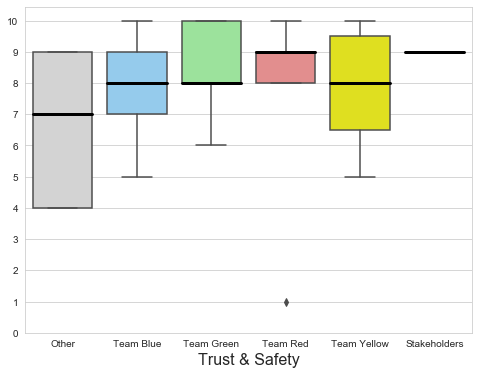

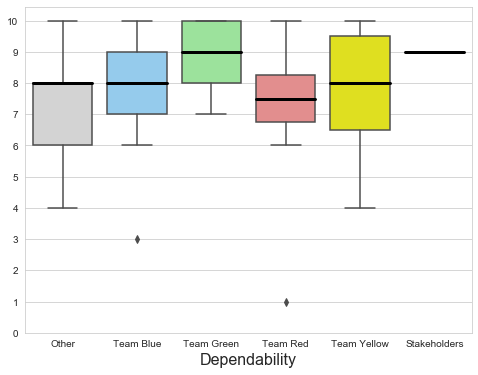

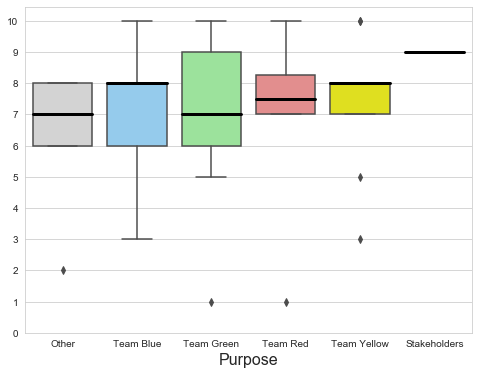

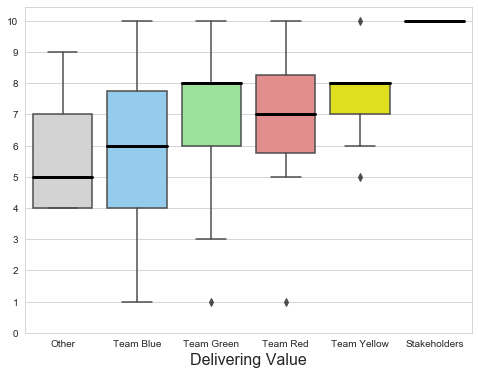

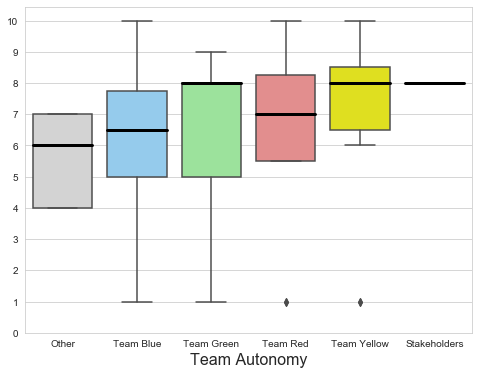

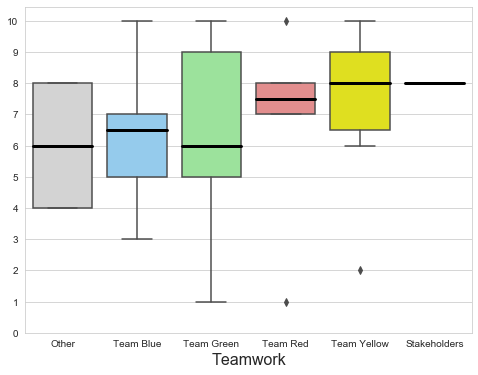

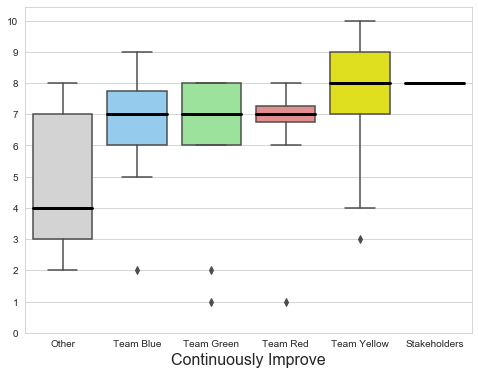

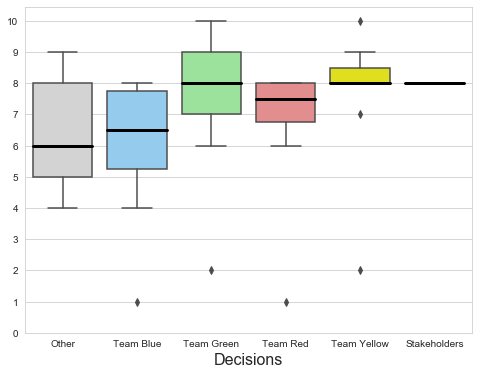

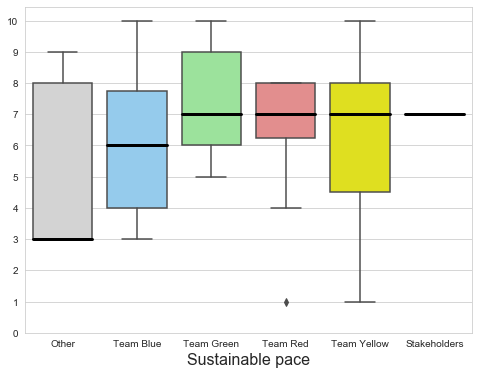

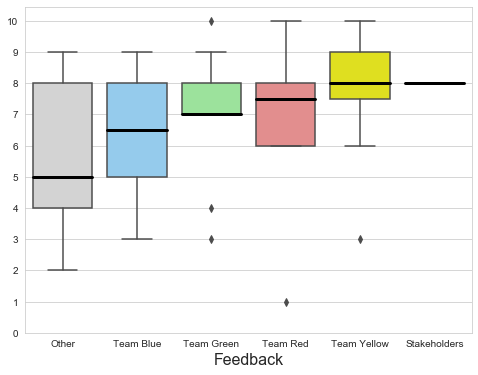

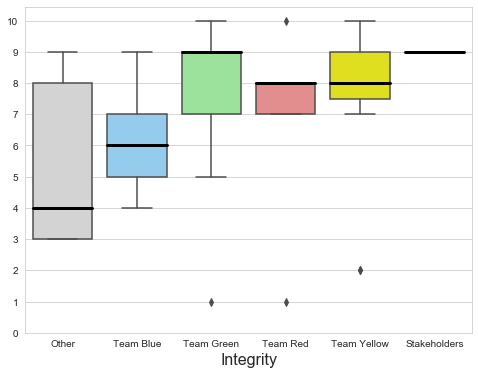

In [12]:
columns = df.drop(['Select your team'], axis=1)

# df_less=df.drop(['Timestamp'], axis=1)

for column in columns: 
    plt.figure(figsize=(8,6))
    sns.set_style("whitegrid")
#     sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})
    chart = sns.boxplot(x='Select your team', y=column, data=df, palette=colors,medianprops={'color':'black','linewidth':'3'})

    chart.set_yticks(np.arange(0, 11, step=1))
    chart.set_xlabel(column, fontsize=16)
    chart.set_ylabel('', fontsize=16)

#     chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontweight='light', fontsize='x-large')
#     chart.set_yticklabels(chart.get_yticklabels(), fontweight='light', fontsize='x-large')
    plt.savefig('PI3/results_'+ column +'.png', bbox_inches='tight')

    